<a href="https://colab.research.google.com/github/Blessing-nwachukwu1/upgraded-octo-pancake/blob/main/WHO_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

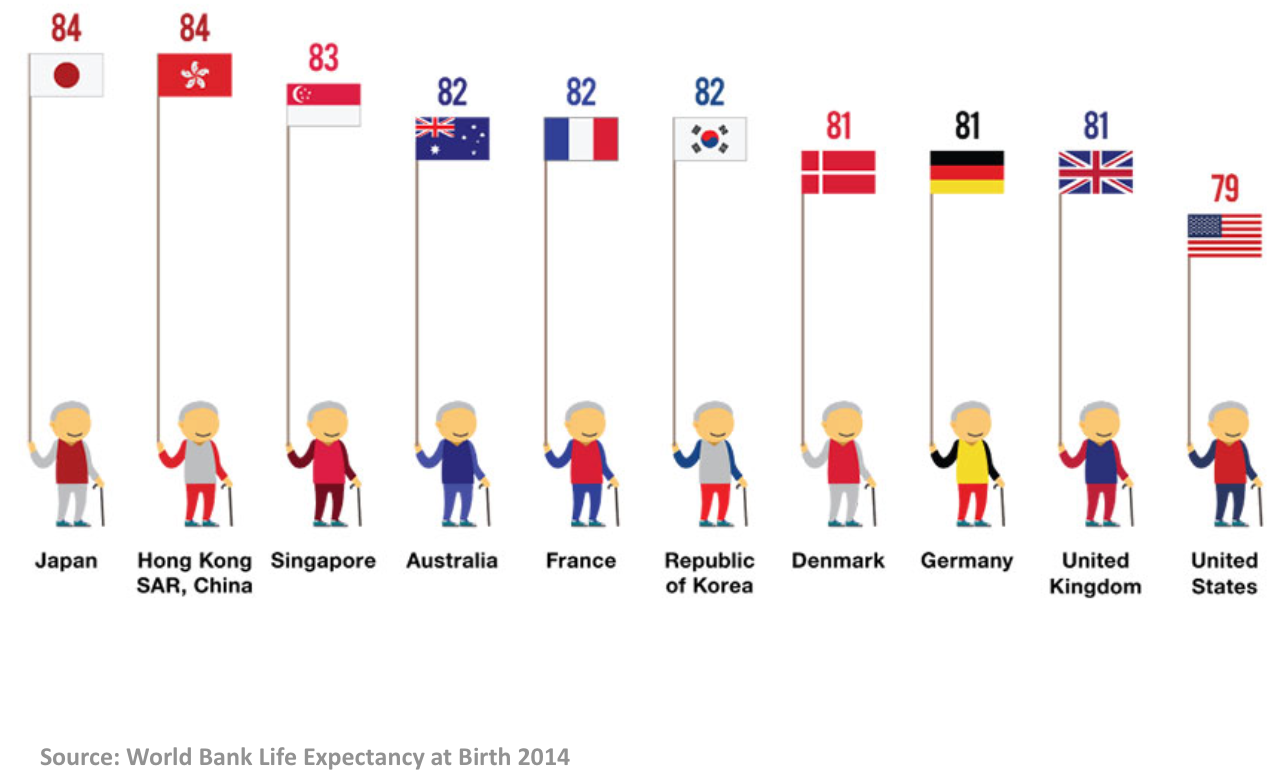

**INTRODUCTION**

The health status of most countries are been kept by the World Health Organization (WHO) through the Global Health Observatory (GHO). They also keep other related factors, however, the datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values.



**ABOUT THE DATA SET**


Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.



**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Reading the data Set**

In [ ]:
df= pd.read_csv("/content/Life Expectancy Data (1).csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**DATA EXPLORATION**

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

**DESCRIPTIVE STATISTICS**

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**DATA CLEANING**

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

data.dropna(subset=['Life expectancy '],inplace=True)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<ipython-input-15-bf8edc8d17be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


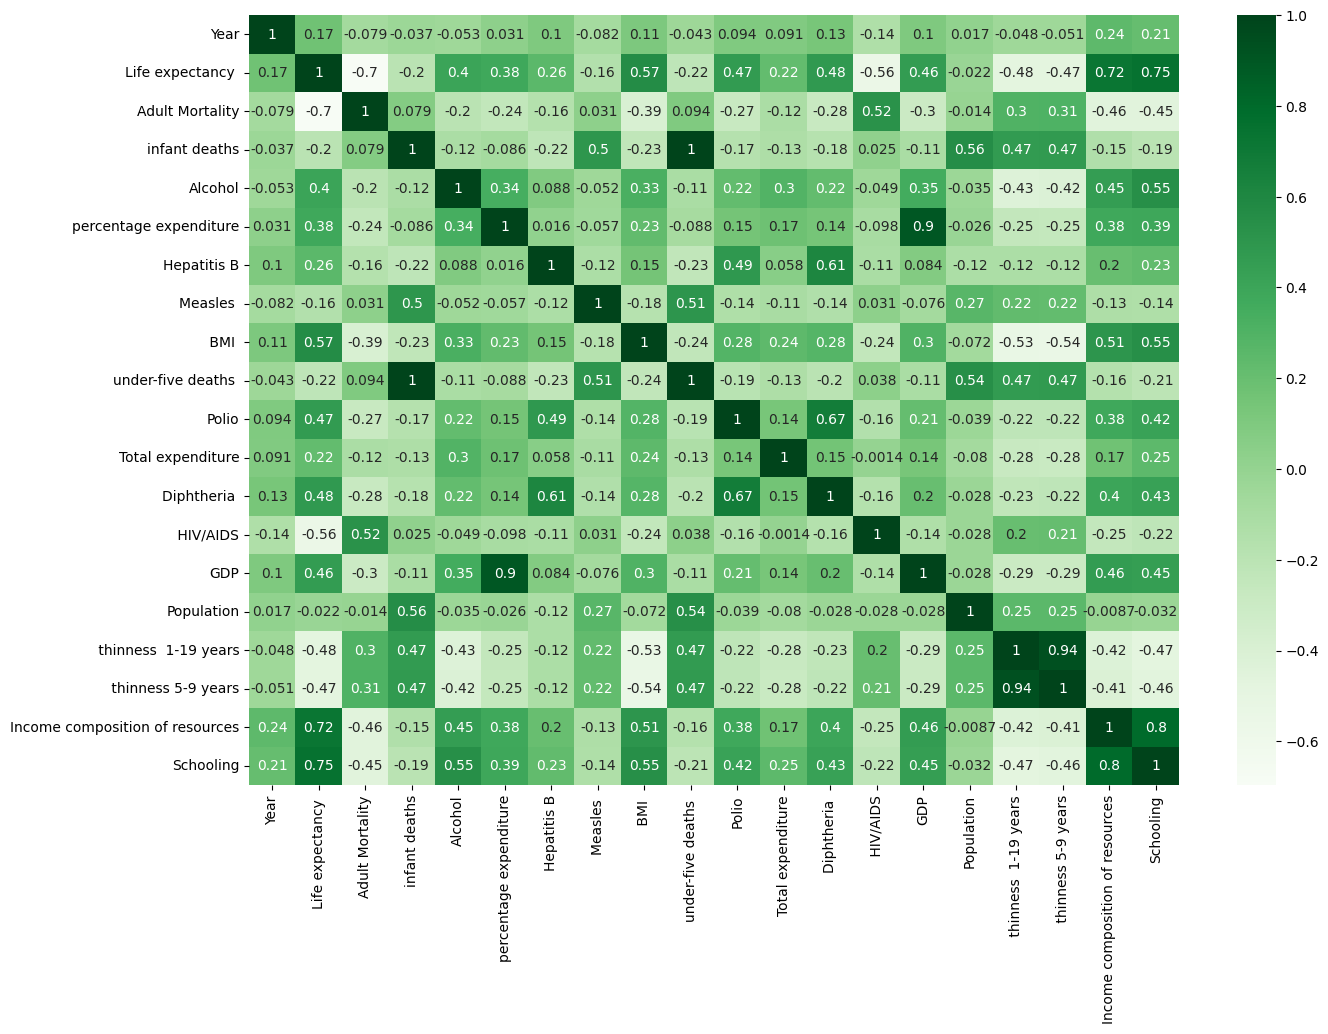

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

**Life expectancy distribution**

Text(0.5, 0, 'Life Expectancy')

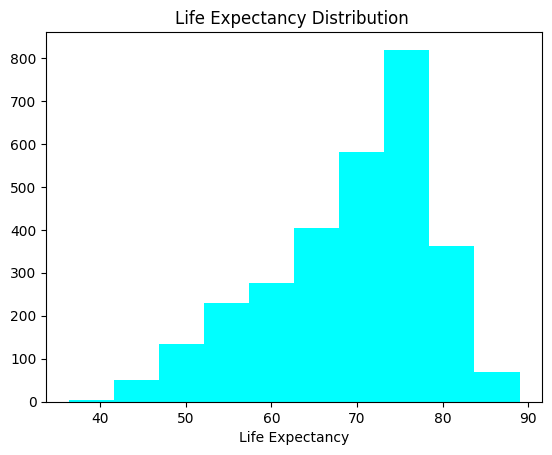

In [ ]:
plt.hist(df["Life expectancy "], color= 'aqua')
plt.title("Life Expectancy Distribution ")
plt.xlabel("Life Expectancy")

This visualization shows that the life expectancy bar graph is left skewed

Text(0.5, 1.0, 'BMI Vs Life expectancy')

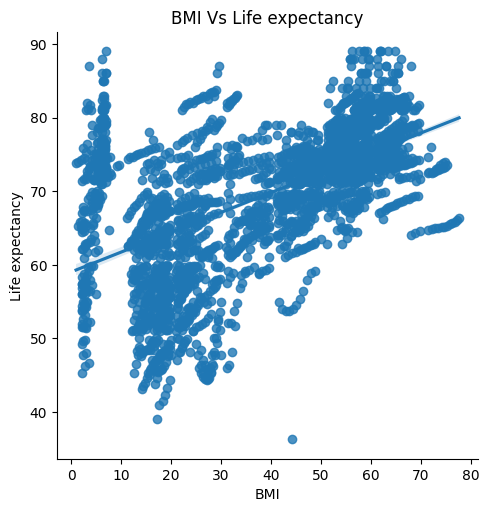

In [ ]:
sns.lmplot(x= " BMI ", y= "Life expectancy ", data=df,)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.title("BMI Vs Life expectancy")

In [ ]:
fig=px.histogram(df,x='Life expectancy ',template='plotly_dark')
fig.show()

Life Expectancy based on Country Status

In [ ]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

The developed countries have more life expectancy

In [ ]:
fig=px.scatter(df,x='GDP',y='Life expectancy ',color='Status',template='plotly_dark',title='Life expectancy Based on Countries GDP')
fig.show()

From the vizualization, it is quite obvious that increase in a country's GDP increases Life Expectancy

**To continue with Machine learning, we need to drop Nan values**

In [ ]:
df.dropna(subset=['Life expectancy '],inplace=True)

In [ ]:
hep = df['Hepatitis B'].mean()
print(hep)
df['Hepatitis B'].fillna(hep, inplace=True)

80.96084210526315


In [ ]:
fillAlcohol = df['Alcohol'].mean()
print(fillAlcohol)
df['Alcohol'].fillna(fillAlcohol,inplace=True)


4.614855575868373


In [ ]:
mbi = df[' BMI '].median()
print(mbi)
df[' BMI '].fillna(mbi,inplace=True)

43.349999999999994


In [ ]:
po = df['Polio'].mean()
print(po)
df['Polio'].fillna(82.54,inplace=True)

82.54824453551913


In [ ]:
tte = df['Total expenditure'].mean()
print(tte)
df['Total expenditure'].fillna(tte,inplace=True)

5.930162842339007


In [ ]:
diph = df['Diphtheria '].median()
print(diph)
df['Diphtheria '].fillna(diph,inplace=True)

93.0


In [ ]:
dp = df['GDP'].mean()
print(dp)
df['GDP'].fillna(dp,inplace=True)

7494.210719388651


In [ ]:
pl = df['Population'].mean()
print(pl)
df['Population'].fillna(pl,inplace=True)

12764541.774711035


In [ ]:
tn1 = df[' thinness  1-19 years'].mean()
print(tn1)
df[' thinness  1-19 years'].fillna(tn1,inplace=True)

4.850621546961325


In [ ]:
tn2 = df[' thinness 5-9 years'].mean()
print(tn2)
df[' thinness 5-9 years'].fillna(tn2,inplace=True)

4.881422651933701


In [ ]:
tn3 = df['Income composition of resources'].mean()
print(tn3)
df['Income composition of resources'].fillna(tn3,inplace=True)

0.6274187138728323


In [ ]:
tn4 = df['Schooling'].mean()
print(tn4)
df['Schooling'].fillna(tn4,inplace=True)

11.9996387283237


**Handling Duplicates**

In [ ]:
df.duplicated().sum()
data = df.drop_duplicates()

**FEATURE ENGENEERING**

In [ ]:
X = df[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy ']

SPLITTING OUR DATA INTO TEST AND TRAIN

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Building the regression model**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

**Fitting the model**

In [ ]:
y_pred = model.predict(X_test)

**Model Evaluation**

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("R-squared:", r2)
print("mse:", mse)
print("mae:", mae)

R-squared: 0.8247036808751269
mse: 15.661747281246765
mae: 3.0185355503088296


**Making predictions with the model**

In [ ]:
predictions = model.predict(X_test)

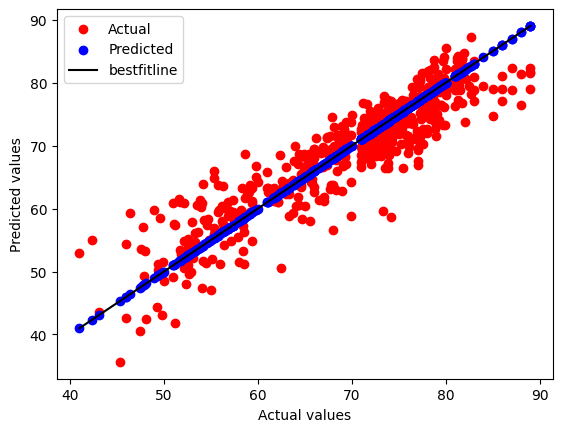

In [ ]:
plt.scatter(y_test, predictions, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='bestfitline')
plt.legend()

SUMMARY

The life expectancy from 193 countries of the world having 2938 rows and 22 columns. The colunms included 'Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', and 'Population'. The data was explored, cleaned and Anlysed using various statistics and analytical skills in python. Different Libraries were used for the data analysis and exploration which includes; pandas imported as pd, numpy imported as np, matplotlib.pyplot imported as plt and Seaborn imported as sns. The methods of data analysis varied between Univariate and bivariate analysis where Univariate analysis was used to explore only numerical or categorical variables respectively and bivariate was used to analyse numerical and categorical variables as the case required using models of count, bar, pie, hist, dough and box plots. Afterwards, the data was split into train and test set and thereby applied to a linear regression model



